In [5]:
import sqlite3
import pandas as pd
import os

In [6]:
sql_path = "../data/sql/"
imdb_path = os.path.join(sql_path, "imdb.sqlite")
imdb_conn = sqlite3.connect(imdb_path)

In [7]:
tables = imdb_conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print(tables)

[('title.ratings',), ('title.principals',), ('title.akas',), ('name.basics',), ('title.basics',), ('title.episode',), ('title.crew',)]


In [14]:
# no. of rows in each table
for table in tables:
    n_rows = imdb_conn.execute(f"SELECT COUNT(*) FROM '{table[0]}'").fetchall()
    print(f"{n_rows[0][0]} rows in table {table[0]}")

1620976 rows in table title.ratings
95052127 rows in table title.principals
53205863 rows in table title.akas
14750628 rows in table name.basics
11946100 rows in table title.basics
9198657 rows in table title.episode
11948211 rows in table title.crew


In [17]:
# column names
for table in tables:
    df = pd.read_sql_query(f"SELECT * FROM '{table[0]}' LIMIT 1", imdb_conn)
    print(f"{table[0]} has columns: {df.columns.tolist()}")

title.ratings has columns: ['tconst', 'averageRating', 'numVotes']
title.principals has columns: ['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']
title.akas has columns: ['titleId', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle']
name.basics has columns: ['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles']
title.basics has columns: ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']
title.episode has columns: ['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber']
title.crew has columns: ['tconst', 'directors', 'writers']


In [33]:
# Movies with over 1 million votes
df = pd.read_sql("SELECT b.primaryTitle as Title, r.averageRating as Rating, r.numVotes as Votes FROM 'title.basics' b JOIN 'title.ratings' r ON r.tconst=b.tconst WHERE r.numVotes > 1000000 AND b.titleType = 'movie' ORDER BY r.averageRating DESC", imdb_conn)
print(df)
print(df.shape)

                                         Title  Rating    Votes
0                     The Shawshank Redemption     9.3  3104681
1                                The Godfather     9.2  2163817
2                              The Dark Knight     9.1  3079698
3                        The Godfather Part II     9.0  1454090
4                             Schindler's List     9.0  1547957
..                                         ...     ...      ...
73                                     Titanic     7.9  1358045
74                                    Iron Man     7.9  1193976
75                                      Avatar     7.9  1447474
76  Star Wars: Episode VII - The Force Awakens     7.7  1010424
77                            The Hunger Games     7.2  1057723

[78 rows x 3 columns]
(78, 3)


array([[<Axes: title={'center': 'Ratings'}>]], dtype=object)

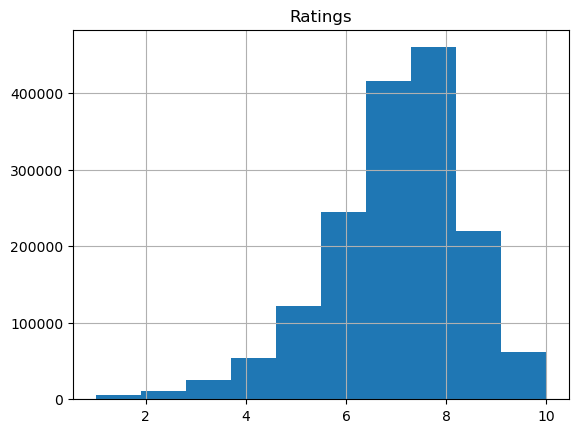

In [36]:
# Rating distribution
df = pd.read_sql("SELECT averageRating AS Ratings FROM 'title.ratings'", imdb_conn)
df.hist()

In [47]:
# Media types
df = pd.read_sql("SELECT titleType, COUNT(*) as count FROM 'title.basics' GROUP BY titleType ORDER BY count DESC", imdb_conn)
print(df)

       titleType    count
0      tvEpisode  9198657
1          short  1086336
2          movie   727314
3          video   316761
4       tvSeries   288412
5        tvMovie   152510
6   tvMiniSeries    65330
7      tvSpecial    54649
8      videoGame    45359
9        tvShort    10771
10       tvPilot        1


In [59]:
# Genre types for movies
df = pd.read_sql("SELECT genres FROM 'title.basics' WHERE titleType = 'movie'", imdb_conn)
print(df['genres'].str.split(',').explode().value_counts())

genres
Drama          265676
Documentary    142932
Comedy         121346
\N              77636
Action          60064
Romance         52444
Thriller        51369
Horror          44852
Crime           42046
Adventure       31125
Mystery         19892
Family          19577
Biography       19392
Fantasy         17547
History         16210
Sci-Fi          15918
Music           14868
Musical         11093
Animation       10773
War             10004
Adult            8587
Sport            8497
Western          8092
News             1486
Film-Noir         880
Reality-TV        587
Talk-Show         212
Game-Show          34
Short               3
Name: count, dtype: int64
